In [1]:
## importing libraries and modules ##

import pandas as pd
import numpy as np
import string

import warnings
warnings.simplefilter(action='ignore',category = FutureWarning)

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.optimizers import Adam


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt') 
from nltk.tokenize import RegexpTokenizer

import matplotlib.pyplot as plt



Using TensorFlow backend.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chepk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chepk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## We use a dataset of over 10,000 tweets to train our model which is categorized into 2:Non-depressive tweets(labelled 0) and Depressive tweets(labelled 1)
### The dataset is obtained from a Github repository

In [2]:
## Checking out the data set for training the model ##

df = pd.read_csv('tweets_data.csv')
print(df)

       Unnamed: 0                                            message  label
0             106  just had a real good moment. i missssssssss hi...      0
1             217         is reading manga  http://plurk.com/p/mzp1e      0
2             220  @comeagainjen http://twitpic.com/2y2lx - http:...      0
3             288  @lapcat Need to send 'em to my accountant tomo...      0
4             540      ADD ME ON MYSPACE!!!  myspace.com/LookThunder      0
...           ...                                                ...    ...
10309      802309  No Depression by G Herbo is my mood from now o...      1
10310      802310  What do you do when depression succumbs the br...      1
10311      802311  Ketamine Nasal Spray Shows Promise Against Dep...      1
10312      802312  dont mistake a bad day with depression! everyo...      1
10313      802313                                                  0      1

[10314 rows x 3 columns]


## We store the texts from the tweets into an array and the labels are stored in a separate array as well 

In [3]:
## Making labels array ##

labels = []


for label in df['label']:
    labels.append(label)

print(labels)

## Making corresponding text array ##

temp1 = []

for msg in df['message']:
    temp1.append(msg)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Apologies for printing out such a large dataset, but it was necessary to illustrate how the dataset is organized. There are non depressive tweets first, represented by label 0 followed by the depressive tweets with label 1

# Visualize the data
## We do a word cloud visualization of the depressive tweets 

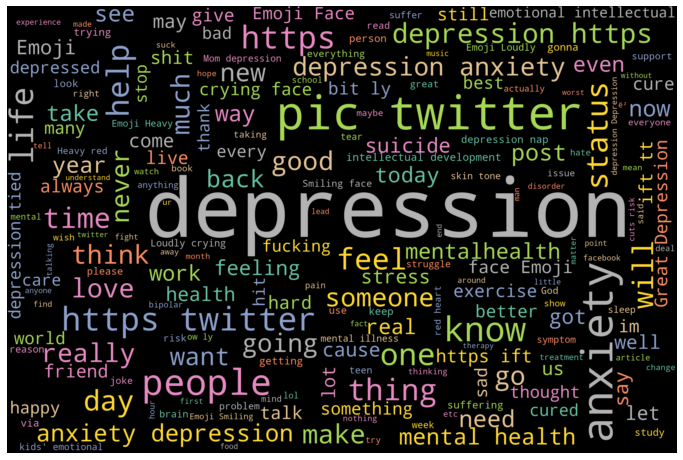

In [4]:
from wordcloud import WordCloud

## Depressive tweets  ##
dep_tweets = df[df.label == 1]
dep_string = []
for t in dep_tweets.message:
    dep_string.append(t)
dep_string = pd.Series(dep_string).str.cat(sep=' ')

wordcloud = WordCloud(width=3000, height=2000, background_color='black', colormap='Set2').generate(dep_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## We do a word cloud visualization of the non-depressive tweets 

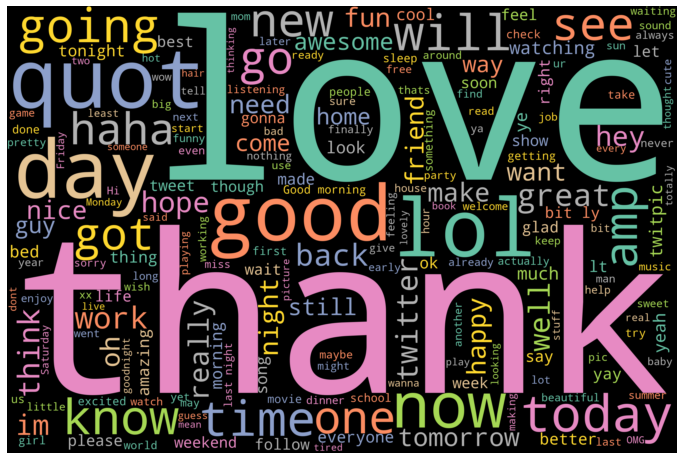

In [5]:
## Non- Depressive tweets ##

nd_tweets = df[df.label == 0]
nd_string = []
for t in nd_tweets.message:
    nd_string.append(t)
nd_string = pd.Series(nd_string).str.cat(sep=' ')

wordcloud = WordCloud(width=3000, height=2000, background_color='black', colormap='Set2').generate(nd_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

 ## Cleaning the Data
 ### Removing stopwords and punctuations 

In [6]:
### Removing stopwords and punctuations ###

stop_words = set(stopwords.words('english')) 

def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 
        

## Removing urls and changing to lowercase

In [7]:
import re
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

tweets = []

for i in range(len(temp1)):
    text = [remove_url(temp1[i]) ]
    #Change to lowercase
    text = [word.lower()for word in text]
    tweets.append(text)
    

print(tweets[:10])
#tweets =[word.lower() for word in tweets]

[['just had a real good moment i missssssssss him so much'], ['is reading manga'], ['comeagainjen'], ['lapcat need to send em to my accountant tomorrow oddly i wasnt even referring to my taxes those are supporting evidence though'], ['add me on myspace myspacecomlookthunder'], ['so sleepy good times tonight though'], ['silkcharm re nbn as someone already said does fiber to the home mean we will all at least be regular now'], ['23 or 24c possible today nice'], ['nite twitterville workout in the am ciao'], ['dananner night darlin sweet dreams to you']]


## Stemming and Lemmatization

In [8]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
stemmer = SnowballStemmer("english")

def lemmatize_stemming(t):
    return stemmer.stem(WordNetLemmatizer().lemmatize(t, pos='v'))

text = []

for i in range(len(tweets)):

    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(listToString(tweets[i])) 

    filtered_sentence = [] 
    
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(lemmatize_stemming(w)) 
    
    text.append(listToString(filtered_sentence))
    
    

print(text[:10])

['real good moment miss much', 'read manga', 'comeagainjen', 'lapcat need send em account tomorrow odd wasnt even refer tax support evid though', 'add myspac myspacecomlookthund', 'sleepi good time tonight though', 'silkcharm nbn someon alreadi say fiber home mean least regular', '23 24c possibl today nice', 'nite twittervill workout ciao', 'danann night darlin sweet dream']


## We do a word cloud visualization of the tweets after cleaning the data 

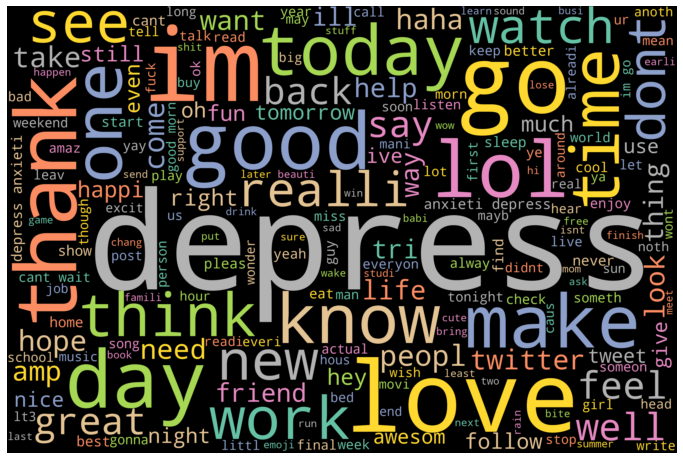

In [9]:
y = listToString(text)
wordcloud = WordCloud(width=3000, height=2000, background_color='black', colormap='Set2').generate(y)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### We included the LDA model from the gensim package in order to visualize the topics in our entire training data. There are two distinct topics representing depressive and non depressive tweets.


In [10]:
import gensim
from gensim import corpora

collection_words = ['emoji','face','faceemoji','twitter']

#Tokenize 
def preprocess(t):
    result=[]
    for token in gensim.utils.simple_preprocess(t) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            if token not in collection_words:
                result.append(token)
            
    return result


processed_tweets = []

for tweet in text:
    processed_tweets.append(preprocess(tweet))

In [11]:
processed_tweets[:5]

[['real', 'good', 'moment', 'miss'],
 ['read', 'manga'],
 ['comeagainjen'],
 ['lapcat',
  'need',
  'send',
  'account',
  'tomorrow',
  'wasnt',
  'refer',
  'support',
  'evid'],
 ['myspac']]

In [12]:
dictionary = corpora.Dictionary((processed_tweets))


#Create the Bag-of-words model
bow_corpus = [dictionary.doc2bow(tweet) for tweet in processed_tweets]

#Running LDA
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 2, 
                                   id2word = dictionary,                                    
                                   passes = 5,
                                   workers = 2)


#For each topic, explore the words occuring in that topic and its relative weight
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")
    

Topic: 0 
Words: 0.062*"depress" + 0.012*"anxieti" + 0.008*"like" + 0.008*"love" + 0.007*"know" + 0.006*"time" + 0.005*"think" + 0.005*"peopl" + 0.004*"mental" + 0.004*"thing"


Topic: 1 
Words: 0.039*"depress" + 0.009*"good" + 0.007*"dont" + 0.007*"work" + 0.007*"like" + 0.006*"life" + 0.006*"feel" + 0.006*"great" + 0.006*"thank" + 0.005*"love"




In [13]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim  
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.077485  0.0       1        1  50.811739
0     -0.077485  0.0       2        1  49.188261, topic_info=          Term         Freq        Total Category  logprob  loglift
12778  anxieti   489.000000   489.000000  Default  30.0000  30.0000
10299  depress  3325.000000  3325.000000  Default  29.0000  29.0000
3846    mental   158.000000   158.000000  Default  28.0000  28.0000
134       work   270.000000   270.000000  Default  27.0000  27.0000
637       life   245.000000   245.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
0         good   122.428270   436.632574   Topic2  -5.5812  -0.5621
106       want    89.880903   216.644690   Topic2  -5.8902  -0.1703
10        need    85.494460   183.848938   Topic2  -5.9403  -0.0561
37       night    81.988315   149.379780   Topic2  -5.9822   0.1096
237     friend    80.176148   156.483551   Topic2  -6.0045   0.0408

[185 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
218        2  0.982115    admit
4600       2  0.968312  alcohol
12849      1  0.972943    anger
12849      2  0.037421    anger
12778      1  0.173812  anxieti
...      ...       ...      ...
320        2  0.058380     wont
134        1  0.841619     work
134        2  0.158726     work
360        1  0.383233     year
360        2  0.617431     year

[251 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

## Tokenize the data

In [14]:
## defining some variables ##

maxlen = 100
training_samples = 8000
validation_samples = 500
test_samples = 1814
max_words = 10000

## Just putting in the code for the tokenizer ##

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(text)

sequences = tokenizer.texts_to_sequences(text)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


### Padding the data to make of the same length ###
data = pad_sequences(sequences, maxlen=maxlen)

### Shapes ###
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

C:\Users\chepk\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Found 19010 unique tokens.
Shape of data tensor: (10314, 100)
Shape of label tensor: (10314,)


## Shuffling the data

In [15]:
## this is for shuffling the data


indices = np.arange(data.shape[0]) ## makes an array of integers from 0 to 10,314 [0,1, .. , 10314]
np.random.shuffle(indices)

data = data[indices]

labels = labels[indices]

C:\Users\chepk\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Splitting the data

In [16]:
## splitting into train and validate directories

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]
x_test = data[training_samples + validation_samples:]
y_test = labels[training_samples + validation_samples:]

C:\Users\chepk\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Making a neural network

In [17]:
## here we are basically opening a .txt file and parsing it to obtain words and their associated coefficients in each line. 
## Then we make a dictionary to make the word as the key and the coefficients as the value
glove_dir = 'glove.twitter.27B.100d.txt'

embeddings_index = {}
f = open(glove_dir,encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print('Found %s word vectors.' % len(embeddings_index))



C:\Users\chepk\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Found 1193515 word vectors.


In [18]:
## Making an embeddings matrix from embeddings vector ##

embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

C:\Users\chepk\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Model with the pre-trained word embeddings layer followed by two dense layers

C:\Users\chepk\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\chepk\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
C:\Users\chepk\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
C:\Users\chepk\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\chepk\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
C:\Users\chepk\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()



Train on 8000 samples, validate on 500 samples
Epoch 1/10
8000/8000 [==============================] - 2s 282us/step - loss: 0.4948 - acc: 0.8325 - val_loss: 0.3568 - val_acc: 0.9200
Epoch 2/10
8000/8000 [==============================] - 2s 261us/step - loss: 0.2857 - acc: 0.9290 - val_loss: 0.2489 - val_acc: 0.9440
Epoch 3/10
8000/8000 [==============================] - 2s 275us/step - loss: 0.2030 - acc: 0.9546 - val_loss: 0.1979 - val_acc: 0.9520
Epoch 4/10
8000/8000 [==============================] - 2s 281us/step - loss: 0.1595 - acc: 0.9671 - val_loss: 0.1692 - val_acc: 0.9560
Epoch 5/10
8000/8000 [==============================] - 2s 282us/step - loss: 0.1323 - acc: 0.9734 - val_loss: 0.1498 - val_acc: 0.9580
Epoch 6/10
8000/8000 [==============================] - 3s 333us/step - loss: 0.1137 - acc: 0.9774 - val_loss: 0.1371 - val_acc: 0.9640
Epoch 7/10
8000/8000 [==============================] - 4s 463us/step - loss: 0.1002 - acc: 0.9809 - val_loss: 0.1271 - val_acc: 0.9660


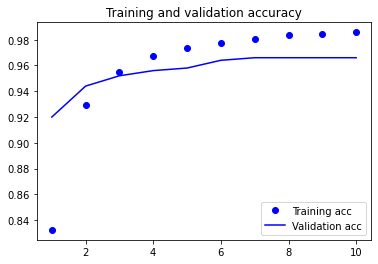

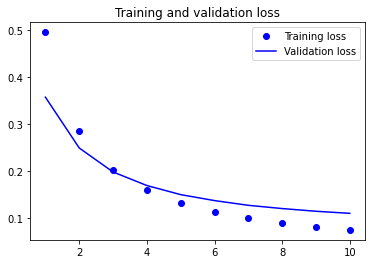

In [19]:

########### Model with the pre-trained word embeddings layer ############


## defining a model ##

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


## adding the embeddings layer and freezing it ##

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


## training the model ##

opt = Adam(lr = 0.0001)
model.compile(optimizer= opt,
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=64,
validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')


## Plotting the results ##

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



In [20]:
### testing the model 1 ##

model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)


  32/1814 [..............................] - ETA: 0s

C:\Users\chepk\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1814/1814 [==============================] - 0s 136us/step


[0.09253476372824483, 0.9718853235244751]

## Model without the embeddings matrix

C:\Users\chepk\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\chepk\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
C:\Users\chepk\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
C:\Users\chepk\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 1,040,009
Trainable params: 1,040,009
Non-trainable params: 0
_________________________________________________________________


C:\Users\chepk\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
C:\Users\chepk\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
C:\Users\chepk\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
C:\Users\chepk\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
C:\Users\chepk\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() inste

Train on 8000 samples, validate on 500 samples
Epoch 1/7
8000/8000 [==============================] - 12s 1ms/step - loss: 0.5283 - acc: 0.7749 - val_loss: 0.4848 - val_acc: 0.7900
Epoch 2/7
8000/8000 [==============================] - 13s 2ms/step - loss: 0.4693 - acc: 0.7797 - val_loss: 0.4279 - val_acc: 0.8180 1s -
Epoch 3/7
8000/8000 [==============================] - 12s 2ms/step - loss: 0.3893 - acc: 0.8385 - val_loss: 0.3433 - val_acc: 0.8660
Epoch 4/7
8000/8000 [==============================] - 12s 1ms/step - loss: 0.2919 - acc: 0.8864 - val_loss: 0.2437 - val_acc: 0.9100
Epoch 5/7
8000/8000 [==============================] - 13s 2ms/step - loss: 0.1998 - acc: 0.9355 - val_loss: 0.1652 - val_acc: 0.9580
Epoch 6/7
8000/8000 [==============================] - 10s 1ms/step - loss: 0.1350 - acc: 0.9711 - val_loss: 0.1156 - val_acc: 0.9760
Epoch 7/7
8000/8000 [==============================] - 9s 1ms/step - loss: 0.0949 - acc: 0.9859 - val_loss: 0.0878 - val_acc: 0.9880


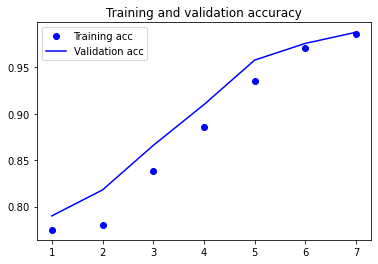

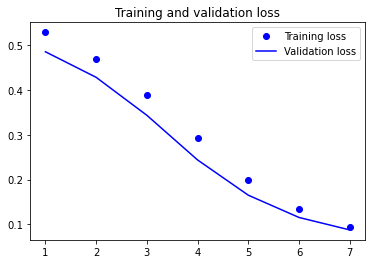

In [21]:

############# Model without the embeddings matrix ###########


## defining a model ##

model2 = Sequential()
model2.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model2.add(Flatten())
model2.add(Dense(4, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()


## training the model ##

opt = Adam(lr = 0.0001)
model2.compile(optimizer= opt,
loss='binary_crossentropy',
metrics=['acc'])
history = model2.fit(x_train, y_train,
epochs=7,
batch_size=32,
validation_data=(x_val, y_val))
model2.save_weights('pre_trained_glove_model2.h5')


## Plotting the results ##

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
 ### testing the model 2 ##

model2.load_weights('pre_trained_glove_model2.h5')
model2.evaluate(x_test, y_test)

1216/1814 [===================>..........] - ETA: 0s

C:\Users\chepk\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1814/1814 [==============================] - 0s 80us/step


[0.10368271330587131, 0.979603111743927]

## Obtaining data from twitter for COVID-19 related tweets using Twint
### Predicting the percentage of depression in tweets with pandemic-related keywords 

In [23]:
########## predicting depression in tweets with pandemic-related keywords ############



## loading the data ##

pandemic_df = pd.read_csv('PandemicKeywordDataSet.csv') 
pandemic_df= pandemic_df.astype(str) ## to convert float to string

## storing the data in an array ##

temp2 = []

for msg in pandemic_df['tweet']:
    temp2.append(msg)

### Removing stopwords and punctuations ###

stop_words = set(stopwords.words('english')) 

pandemic_text = []

for i, msg in enumerate(temp2):

    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(msg) 

    filtered_sentence = [] 
    
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(lemmatize_stemming(w))  
    
    pandemic_text.append(listToString(filtered_sentence))

print(pandemic_text[:10])


## Tokenization of the data ##


tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(pandemic_text)

sequences1 = tokenizer.texts_to_sequences(pandemic_text)
word_index1 = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index1))

## padding to make data of equal length ##

pandemic_data = pad_sequences(sequences1, maxlen=maxlen)

## Making test data ##

x_test_pandemic = pandemic_data[:]

## Making predictions ##

y_pred_pandemic = model2.predict_classes(x_test_pandemic)


## looping through results to segregate dep vs no-dep ##

dep_c = 0
ndep_c = 0

for y in y_pred_pandemic:
    if y == 0:      ## 0 is for not depressive and 1 is for depressive
        ndep_c += 1

    else:
        dep_c +=1

total = ndep_c + dep_c
ndep_per = ndep_c*100/total
dep_per = dep_c*100/total

print(f'{ndep_per} percent of the tweets are not depressive')
print(f'{dep_per} percent of the tweets are depressive')



C:\Users\chepk\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['totheworld_uwu i liter struggl like tmi pandem cockblock month i readi explod', 'yong stress ka na ngayong pandem tapo iistressin ka lalo haist', 'wheatgermdust heathrowsnowman mattwookey so dead popul uk increas last year wow pandem pandem brainwash insan', 'how pivot ecommerc tip canonukandi the covid 19 pandem kickstart camera compani digit transform journey it continu focus sharpli ecommerc offer new put pictur raconteur https co ncsvjr47h9 https co c0nqlczfok', 'idk want pandem p vouch call lillard shoot bad', 'yep menopaus burnout pandem aw lot forwallow x', 'ldncall can alway drive van increas job vacanc result supermarket retail launch onlin home deliveri servic due pandem amazon warehous bomb along', 'alexa pleas show idiot suggest regard pandem far', 'めっちゃいい人やんこの人', 'would rather go club hous parti small get togeth 4 5 friend pandem i bare see human besid immedi famili month kind question even https co b3p656il6z']
Found 5975 unique tokens.
30.0 percent of the tweets are no

### Predicting the percentage of depression in tweets with COVID-related keywords 

In [24]:
########## predicting depression in tweets with covid-related keywords ############



## loading the data ##

covid_df = pd.read_csv('CovidKeywordDataSet.csv') 
covid_df= covid_df.astype(str) ## to convert float to string


## storing the data in an array ##

temp2 = []

for msg in covid_df['tweet']:
    temp2.append(msg)


### Removing stopwords and punctuations ###

stop_words = set(stopwords.words('english')) 

covid_text = []

for i, msg in enumerate(temp2):

    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(msg) 

    filtered_sentence = [] 
    
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(lemmatize_stemming(w)) 
    
    covid_text.append(listToString(filtered_sentence))

print(covid_text[:10])


## Tokenization of the data ##


tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(covid_text)

sequences1 = tokenizer.texts_to_sequences(covid_text)
word_index1 = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index1))

## padding to make data of equal length ##

covid_data = pad_sequences(sequences1, maxlen=maxlen)

## Making test data ##

x_test_covid = covid_data[:]

## Making predictions ##

y_pred_covid = model2.predict_classes(x_test_covid)

## looping through results to segregate dep vs no-dep ##

dep_c = 0
ndep_c = 0

for y in y_pred_covid:
    if y == 0:      ## 0 is for not depressive and 1 is for depressive
        ndep_c += 1

    else:
        dep_c +=1

total = ndep_c + dep_c
ndep_per = ndep_c*100/total
dep_per = dep_c*100/total

print(f'{ndep_per} percent of the tweets are not depressive')
print(f'{dep_per} percent of the tweets are depressive')

C:\Users\chepk\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['kerana iran negara yang beriklim pana kalau memang dgn berhati hati boleh mencegah corona mana mungkin putera charl amp beberapa keluarga istana telah dijangk covid19 kerana kehidupan mereka pal hati2 amp berwaspada kenapa demikian mungkin jawapanya kerana hidup', 'assalamualaikum semua covid 19 kalau memang kebersihan boleh mencegah corona mengapa itali rakyatnya yg dijangk mencecah 135 000 org kerana itali antara negara terbersih di eropah kalau memang pana boleh membunuh corona di iran kini angkanya sudah mencecah 67 000 org', 'can trust chines covid 19 scienc no https co wkr5upfjuv', 'zelf denk ik dat het amateurvoetb eruit vliegt eigenlijk all amateur sporten maar de prof gaan door aangezien ze hebben geleerd van de 1e coronagolf voetbal coronapandemi coronamaatregelen hockey lockdown covid19 corona', 'covid 19 updat https co acqe9usedn', 'verajourova euprosecutor eu nextgenerationeu euco eu2020d covid19 corona https co 82bcoryhr', 'i suhaib ahmad commit vigil bear mind time ris

### Predicting the percentage of depression in neutral tweets 

In [25]:
########## predicting depression in neutral tweets ############

## loading the data ##

neutral_df = pd.read_csv('NeutralDataSet.csv') 
neutral_df= neutral_df.astype(str) ## to convert float to string


## storing the data in an array ##

temp3 = []

for msg in neutral_df['tweet']:
    temp3.append(msg)


### Removing stopwords and punctuations ###

stop_words = set(stopwords.words('english')) 

neutral_text = []

for i, msg in enumerate(temp3):

    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(msg) 

    filtered_sentence = [] 
    
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(lemmatize_stemming(w)) 
    
    neutral_text.append(listToString(filtered_sentence))

print(neutral_text[:10])



## Tokenization of the data ##


tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(neutral_text)

sequences2 = tokenizer.texts_to_sequences(neutral_text)
word_index2 = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index2))

## padding to make data of equal length ##

neutral_data = pad_sequences(sequences2, maxlen=maxlen)

## Making test data ##

x_test_neutral = neutral_data[:]

## Making predictions ##

y_pred_neutral = model2.predict_classes(x_test_neutral)

## looping through results to segregate dep vs no-dep ##

dep_n = 0
ndep_n = 0

for y in y_pred_neutral:
    if y == 0:      ## 0 is for not depressive and 1 is for depressive
        ndep_n += 1

    else:
        dep_n +=1

total = ndep_n + dep_n
ndep_per_n = ndep_n*100/total
dep_per_n = dep_n*100/total

print(f'{ndep_per_n} percent of the tweets are not depressive')
print(f'{dep_per_n} percent of the tweets are depressive')

C:\Users\chepk\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['wougnet webfound a4a_internet forcfma ucc_offici isocug with 85 uganda resid rural area women girl constitut close 60 becom abit hard rural women access ict digit platform wougnet webfound a4a_internet', 'build dep bump helloj 1 18 4 1 18 6 websit client accept releas soon https co qdx5x7bms2', 'kamalaharri by togeth mean women agre women will back tweet support ami coney barrett woman work hard impecc record rise highest opportun profess let see', 'love btw beer boy l amp p kid', 'jackposobiec michell fair mind racist bone bodi', 'coronavirus hot tub parti break student fin https co d9amzx6xnk student say celebr seri negat test also penalis bbc news newsatw', 'choitaek1 oh see month ko lang napanood tharntyp super addict na ako sa kanila huhu thank u sa info', 'diilat see peopl', 'when peopl start miss flight airlin start complain home govern 1984 adjust block sarsmustend', 'coachjones_11 most tn support awesom hear pay attent complain']
Found 6153 unique tokens.
68.1 percent of the

### Predicting the percentage of  depression in neutral tweets with keyword "the"

In [26]:
########## predicting depression in neutral tweets (with keyword "the") ############

## loading the data ##

q_df = pd.read_csv('TheKeywordDataSet.csv') 
q_df= q_df.astype(str) ## to convert float to string


## storing the data in an array ##

temp4 = []

for msg in q_df['tweet']:
    temp4.append(msg)


### Removing stopwords and punctuations ###

stop_words = set(stopwords.words('english')) 

q_text = []

for i, msg in enumerate(temp4):

    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(msg) 

    filtered_sentence = [] 
    
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(lemmatize_stemming(w))  
    
    q_text.append(listToString(filtered_sentence))

print(q_text[:10])

## Tokenization of the data ##


tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(q_text)

sequences3 = tokenizer.texts_to_sequences(q_text)
word_index3 = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index3))

## padding to make data of equal length ##

q_data = pad_sequences(sequences3, maxlen=maxlen)

## Making test data ##

x_test_q = q_data[:]

## Making predictions ##

y_pred_q = model2.predict_classes(x_test_q)

## looping through results to segregate dep vs no-dep ##

dep_q = 0
ndep_q = 0

for y in y_pred_q:
    if y == 0:      ## 0 is for not depressive and 1 is for depressive
        ndep_q += 1

    else:
        dep_q +=1

total = ndep_q + dep_q
ndep_per_q = ndep_q*100/total
dep_per_q = dep_q*100/total

print(f'{ndep_per_q} percent of the tweets are not depressive')
print(f'{dep_per_q} percent of the tweets are depressive')

C:\Users\chepk\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['is america great yet 100 day fewer nation nightmar 22 day elect notmypresid resist kingtrump commanderofchao bidenharristrump2020 tre45on personwomanmancameratv', 'd_rox_7 thank repli anyth post link area cc', 'fynbospollen acmjuli crud coverslip lift slight creat local high mountant slide away', 'ozturk5alpaslan adam gibii adamm', 'thatericalp the monke', 'a bite like fashion industri twelv month ahead', 'wank4t33n _landofladi the right', 'i stream fancam alot today i stop thinkinga even i tri i keep think right wish best pray realli fine run dream happy_k_day', 'roakeypoakey thattimwalk agre the day i watch rhod gilbert day experi episod social care 1 train intens joke 2 serious job high respons it tough i think i cut upmost respect', 'artsy_marxist this would make great tattoo']
Found 5708 unique tokens.
73.9 percent of the tweets are not depressive
26.1 percent of the tweets are depressive


## Testing how our model performs on individual tweets

In [32]:
message = ['I feel lonely']

message = tokenizer.texts_to_sequences(message)

message = pad_sequences(message, maxlen=maxlen)

model.predict(message)

C:\Users\chepk\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.8795362]], dtype=float32)

In [45]:
message = ['I am a man u fan']

message = tokenizer.texts_to_sequences(message)

message = pad_sequences(message, maxlen=maxlen)

model.predict(message)

C:\Users\chepk\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.33473518]], dtype=float32)

In [35]:
message = ['Loving how me and my lovely partner is talking about what we want']

message = tokenizer.texts_to_sequences(message)

message = pad_sequences(message, maxlen=maxlen)

model.predict(message)

C:\Users\chepk\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.00079673]], dtype=float32)

In [44]:
message = ['Feeling anxious about the 20s, hope I dont go into depression']

message = tokenizer.texts_to_sequences(message)

message = pad_sequences(message, maxlen=maxlen)

model.predict(message)

C:\Users\chepk\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.9069138]], dtype=float32)